*Mount google drive*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip3 install numpy==1.19.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
xarray-einstats 0.4.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jax 0.3.25 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, bu

In [ ]:
!pip install -q pyyaml h5py
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.0 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.0 which is incompatible.


*Import necessary libraries*

In [ ]:
import numpy as np


import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from attention import AttentionLayer
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
!cp drive/MyDrive/keyword_extraction_ml_2022/articles_csv/all_pre_processed_articles_more_data.csv /content/localexs

*Import Articles CSV*

In [ ]:
data=pd.read_csv("/content/localexs/all_pre_processed_articles_more_data.csv",nrows=90000)

In [ ]:
data.drop_duplicates(subset=['article_summary'],inplace=True)#dropping duplicates
data.dropna(axis=0,inplace=True)#dropping na

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85707 entries, 0 to 89999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       85707 non-null  int64 
 1   article_summary  85707 non-null  object
 2   keywords         85707 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
def clean_text(text):
    text = text.lower()
    text = text.replace('ç','c')
    text = text.replace('ü','u')
    text = text.replace('ğ','g')
    text = text.replace('ı','i')
    text = text.replace('ö','o')
    text = text.replace('ş','s')
    return text

In [ ]:
#call the function
cleaned_text = []
for t in data['article_summary']:
    cleaned_text.append(clean_text(t))

In [ ]:
cleaned_text[:5]

['bu arastirma 2002 ve 2003 yillarinda hidrografik acidan bir havza ozelligi gosteren yaklasik 1900 km2 lik bir yuzolcume sahip erzurumun tortum ve uzundere ilceleri icerisinde yer alan tortum cayi havzasinda yapilmistir calisma alani fitocografik konum itibari ile a8 ve a9 kareleri icerisinde yer alir arastirma alani ayni zamanda i̇ran turan ve avrupa sibirya floristik bolgelerinin kesisim noktasindadir arastirmanin amaci yoredeki kentsel ve kirsal mekanlarda peyzaj planlama ve tasarim calismalarinda kullanilabilecek dogal odunsu bitkileri belirlemektir arastirma alaninda 25 familyaya ait 54 odunsu bitki turu tespit edilmistir ayrica yetisme ortami ozellikleri ile bitkilerin fenolojik ve morfolojik ozellikleri belirlenmistir yapilan degerlendirme sonucunda bu bitki turlerinden 30unun peyzaj onarim calismalarinda 28inin karayolu kenari orta refuj ve otopark planlamalarinda 19unun kaya ve kuru duvar bahcelerinde 9unun yer ortucu olarak ve 39unun estetik ozelliklerinden dolayi kullanilab

In [ ]:
#call the function
cleaned_summary = []
for t in data['keywords']:
    cleaned_summary.append(clean_text(t))

In [ ]:
cleaned_summary[:10]

['odunsu bitkiler peyzaj planlama dogal bitki turleri tortum cayi havzasi',
 'azerbaycan faydali bitkiler dag ekosistemi',
 'zonguldak flora pteridophyta spermatophyta',
 'minuartia nifensis ureme biyolojisi nif dagi turkiye',
 'birliktelik analizi bitki ekolojisi orman yetisme ortami akdeniz bolgesi vejetasyon',
 'flora gaziantep lokaliteler',
 'peganum harmala anatomi polen morfoloji isik mikroskobu turkiye',
 'bati anadolu bryofit flora tufa formasyonu turkiye',
 'flora hacikadin vadisi ankara turkiye',
 'gaziantep teucrium yeni lokalite']

In [ ]:
data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary

In [ ]:
data.replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

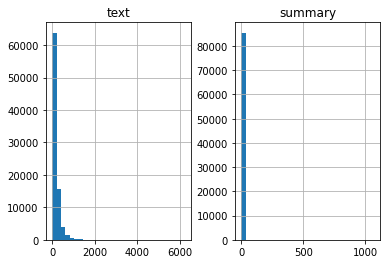

In [ ]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'Ozetce':text_word_count, 'Anahtar sozcuk':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [ ]:
cnt=0
for i in data['cleaned_summary']:
    if(len(i.split())<=7):
        cnt=cnt+1
print(cnt/len(data['cleaned_summary']))

NameError: ignored

In [ ]:
cnt=0
for i in data['cleaned_text']:
    if(len(i.split())<=200):
        cnt=cnt+1
print(cnt/len(data['cleaned_text']))

0.7289719626168224


In [ ]:
max_text_len=200
max_summary_len=8

In [ ]:
cleaned_text =np.array(data['cleaned_text'])
cleaned_summary=np.array(data['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])

df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59892 entries, 0 to 59891
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     59892 non-null  object
 1   summary  59892 non-null  object
dtypes: object(2)
memory usage: 935.9+ KB


In [ ]:
cleaned_text2 = []
for t in df['text']:
    cleaned_text2.append(clean_text(t))

In [ ]:
cleaned_text2[:5]

['azerbaycanin daglik bolgelerinde yayilis gosteren 60 familya ve 194 cinse ait 321 faydali bitkiye rastlanilmistir arastirma 200220006 yillari arasinda gerceklestirilmistir bu bitkilerin 124u sus 60i tibbi 54u gida 42si eterik yagli 39u bal veren 19u vitamin 18i zehirli 17si boya 11i yem 6si kaucuklu ve 1 adet sabun icerikli oldugu belirlenmistir alanda rastlanan bitkilerin toplam sayisinin 515i asteraceae lamiaceae liliaceae rosaceae apiaceae ve primulaceae familyalarina 135i ise thymus nepeta primula achillea pyretrum ve polygonum cinslerine ait olan taksonlardir bu bitkilerin 723u 231 takson otsu bunun da 56i cok yillik 119u tek yillik 44u ise iki yillik biriki yillik ve ikicok yillik 69u soganli 188i 62 takson odunsu bunlardan 116i cali 25i agac 47i yari cali govdeli 2 rizomlu 06 3 09 ve 1 03 sarilicitirmanici bitkiye rastlanmistir alanda 34 endemik ture rastlanilmistir bunlardan 8i azerbaycanda 26si ise kafkasyada yayilis gostermektedir',
 'bu arastirma zonguldak ili sinirlari ic

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.1,random_state=0,shuffle=True)

In [ ]:
print(len(list(x_val)))

5990


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

In [ ]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 69.7080291970803
Total Coverage of rare words: 4.01346725287686


In [ ]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr)
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [ ]:
x_voc

66401

In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

In [ ]:
print(len(list(y_tr)))

53902


In [ ]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 82.54276419351454
Total Coverage of rare words: 9.423374038090145


In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr)
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val)

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [ ]:
y_tokenizer.word_counts['sostok'],len(y_tr)

(53902, 53902)

In [ ]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [ ]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [ ]:
from keras import backend as K
K.clear_session()

latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#call attention using:
from keras.layers import AdditiveAttention

#Modify your code and provide decoder_outputs first and encoder_outputs next as parameters.
attn_layer = AdditiveAttention(use_scale=True)([decoder_outputs, encoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_layer])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 200, 100)     6640100     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 200, 300),   481200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
filepath = '/content/drive/MyDrive/keyword_extraction_ml_2022'
checkpoint_callback = ModelCheckpoint(filepath= filepath,
                                                         save_weights_only=True, save_best_only=True)

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=25,callbacks=[es],batch_size=1024, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/25
52/52 [==============================] - 114s 2s/step - loss: 2.6664 - val_loss: 2.5639
Epoch 2/25
52/52 [==============================] - 114s 2s/step - loss: 2.5567 - val_loss: 2.4706
Epoch 3/25
52/52 [==============================] - 114s 2s/step - loss: 2.4735 - val_loss: 2.4265
Epoch 4/25
52/52 [==============================] - 114s 2s/step - loss: 2.4100 - val_loss: 2.3824
Epoch 5/25
52/52 [==============================] - 113s 2s/step - loss: 2.3369 - val_loss: 2.3105
Epoch 6/25
52/52 [==============================] - 113s 2s/step - loss: 2.2650 - val_loss: 2.2937
Epoch 7/25
52/52 [==============================] - 114s 2s/step - loss: 2.1896 - val_loss: 2.1980
Epoch 8/25
52/52 [==============================] - 114s 2s/step - loss: 2.1242 - val_loss: 2.1630
Epoch 9/25
52/52 [==============================] - 113s 2s/step - loss: 2.0685 - val_loss: 2.1338
Epoch 10/25
52/52 [==============================] - 113s 2s/step - loss: 2.0161 - val_loss: 2.1012
Epoch 11/

In [ ]:
model.save('keyword_extraction_2022_model.h5')

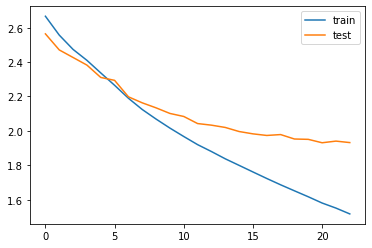

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_layer2 = AdditiveAttention(use_scale=True)([decoder_outputs2, decoder_hidden_state_input])

decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_layer2])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(300,500):
    print("Article summary:",seq2text(x_tr[i]))
    print("Original keywords:",seq2summary(y_tr[i]))
    print("Predicted keywords:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Article summary: i̇stanbulda 16 nisanda yapilacak halk oylamasi dolayisiyla 33 bin 582 emniyet personelinin gorevli olacagi bildirildi i̇stanbul emniyet mudurlugunun aciklamasinda 16 nisan pazar gunu yapilacak halk oylamasiyla ilgili kentte polis sorumluluk bolgesinde oy kullanma isleminin 39 ilce bin 669 sandik alani ve 25 bin 864 sandikta gerceklestirilecegi kaydedildi aciklamada halk oylamasinin guvenli ve duzenli bir sekilde yapilmasini saglamak amaciyla oy pusulalarinin oy verme isleminin yapilacagi sandik alanlarina saglikli bir sekilde getirilmesi hicbir baski ve yonlendirme altinda kalmadan secmenlerin oylarini hur iradeleriyle kullanabilmeleri sayim ve dokum islemine baslanmasi kagit ve paketlenerek torbaya konulmasi sayima iliskin oy toplama merkezlerine nakli ve teslimi sureclerinde 33 bin 582 personelimiz gorev yapacaktir ifadeleri kullandi referandum aciklamasi ak parti konya milletvekili davutoglu i̇nsallah 16 nisanda mecliste kabul edilen bu anayasa degisikligi halkimizi